# Quantized FACILE Training with Brevitas
This notebook walks through the steps to train and and validate the Pytorch Brevitas reconstruction of the HCAL Facile model

Initial Pytorch conversion by Vladimir Oveckhin
Pytorch to Brevitas conversion by Matthew Trahms

In [1]:
#install pandas (missing in FINN env)
!pip install --user pandas

     |################################| 9.5MB 1.9MB/s eta 0:00:01


In [2]:
#import the necessary classes and functions
from train import train
from metrics import Metrics
from quant_model import QuantNet
from quant_modelV2 import QuantNet_opt
#from quantmodelV2_with_proc import QuantNet_opt_proc

In [3]:
models_folder = 'quant_models'

X_train shape: (229538, 14)
X_val shape: (12752, 14)
X_test shape: (12752, 14)
Y_train shape: (229538, 1)
Y_val shape: (12752, 1)
Y_test shape: (12752, 1)
Using saved split data
Number of batches per epoch: 460
# of Model parameters: 982.0
# of features: 14


Epoch 1
Ave Train Loss: 0.0005421313399584329
Ave Val Loss: 0.018976167317420717
Ave Q Train Loss: 1.7180227481035786
Ave Q Val Loss: 45.75669473315042
Min Ave Val Loss: 0.018976167317420717
Saved model


Epoch 2
Ave Train Loss: 0.00037077133661769844
Ave Val Loss: 0.016479057718127493
Ave Q Train Loss: 1.4058156357793374
Ave Q Val Loss: 38.670282273065474
Min Ave Val Loss: 0.016479057718127493
Saved model


Epoch 3
Ave Train Loss: 0.0003236604831564686
Ave Val Loss: 0.016953422140980525
Ave Q Train Loss: 1.396246303775095
Ave Q Val Loss: 41.076026432097905
Min Ave Val Loss: 0.016479057718127493


Epoch 4
Ave Train Loss: 0.0003204660557978361
Ave Val Loss: 0.016971651937753435
Ave Q Train Loss: 1.4916788783955603
Ave Q Val Loss: 4

Ave Train Loss: 0.0002999112611078435
Ave Val Loss: 0.016807183031997984
Ave Q Train Loss: 1.3692214921015426
Ave Q Val Loss: 40.71055409264943
Min Ave Val Loss: 0.013979643051113402


Epoch 37
Ave Train Loss: 0.00029865875267609803
Ave Val Loss: 0.015953233583815514
Ave Q Train Loss: 1.3666490009821954
Ave Q Val Loss: 34.29125825185624
Min Ave Val Loss: 0.013979643051113402


Epoch 38
Ave Train Loss: 0.00029480464596206115
Ave Val Loss: 0.014982579630755243
Ave Q Train Loss: 1.3565937360623568
Ave Q Val Loss: 36.00816956777421
Min Ave Val Loss: 0.013979643051113402


Epoch 39
Ave Train Loss: 0.00029770072862259355
Ave Val Loss: 0.0152982503826183
Ave Q Train Loss: 1.3635056545382311
Ave Q Val Loss: 39.77725625416589
Min Ave Val Loss: 0.013979643051113402


Epoch 40
Ave Train Loss: 0.00029611289936790357
Ave Val Loss: 0.014645165985538847
Ave Q Train Loss: 1.3784950891260805
Ave Q Val Loss: 34.678163195413255
Min Ave Val Loss: 0.013979643051113402


Epoch 41
Ave Train Loss: 0.000296093

Ave Train Loss: 0.00029926980551721777
Ave Val Loss: 0.014550131967379934
Ave Q Train Loss: 1.3495365193310858
Ave Q Val Loss: 38.714639027913414
Min Ave Val Loss: 0.013416541917693047


Epoch 74
Ave Train Loss: 0.0002977700246245733
Ave Val Loss: 0.01852425453918321
Ave Q Train Loss: 1.3654072436824867
Ave Q Val Loss: 36.70787472195096
Min Ave Val Loss: 0.013416541917693047


Epoch 75
Ave Train Loss: 0.000298427391274162
Ave Val Loss: 0.018855455523682018
Ave Q Train Loss: 1.3694988533554953
Ave Q Val Loss: 36.91036624000186
Min Ave Val Loss: 0.013416541917693047


Epoch 76
Ave Train Loss: 0.00029256590583405886
Ave Val Loss: 0.013664228457307059
Ave Q Train Loss: 1.35643564421727
Ave Q Val Loss: 42.548570784311444
Min Ave Val Loss: 0.013416541917693047


Epoch 77
Ave Train Loss: 0.00029820494536126035
Ave Val Loss: 0.01410245629293578
Ave Q Train Loss: 1.3662931064693162
Ave Q Val Loss: 37.681604960608105
Min Ave Val Loss: 0.013416541917693047


Epoch 78
Ave Train Loss: 0.00029456936

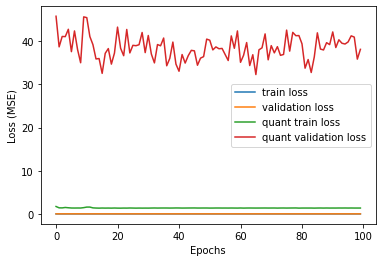

In [5]:
#train (mimicing structure in train.py)
metrics = Metrics()
model = None
try:
    model = train(QuantNet_opt, metrics=metrics, models_folder_path=models_folder, quantized=True)
except KeyboardInterrupt:
    print("Interrupted")
finally:
    metrics.plot_losses()

In [6]:
#export to onnx finn format
from brevitas.onnx import export_finn_onnx
input_shape = [1,14]
export_finn_onnx(model, input_shape, models_folder + "/facileV3_4b_500.onnx")